<a href="https://colab.research.google.com/github/Annette-1/Ecuaciones_Diferenciales_Parciales/blob/main/M%C3%A9todo_m%C3%ADnimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:blue;">MÉTODO DE MÍNIMOS CUADRADOS</span>


Al igual que el <span style="color:blue;"> Método de colocación para una EDO</span> para el método de <span style="color:purple;">mínimos cuadrados</span> propondremos:

$$u_N=∑_{i=1} ^N α_i β_i$$ (*función de prueba*)

Pero ahora elegiremos los parámetros de tal manera que se **minimize** la cantidad:

$$ F= ∫_a ^b E^2 dx$$
 Donde $[a,b]$ es el intervalo de interés

 Para reolver este tipo de integrales nos ayudamos de la <span style="color:purple;"> **Regla de Leibniz**</span>
$$
 \frac{d}{dx} \int_{a}^{b} f(x,t) \, dt = \int_{a}^{b} \frac{\partial}{\partial x} f(x,t) \, dt
$$

o bien
$$
\frac{\partial}{\partial x_i} \int_{\Omega(x)} f(\mathbf{x},\mathbf{t}) \, d\mathbf{t} = \int_{\partial\Omega(x)} f(\mathbf{x},\mathbf{t}) \mathbf{n} \cdot \frac{\partial \mathbf{t}}{\partial x_i} \, dS + \int_{\Omega(x)} \frac{\partial f}{\partial x_i}(\mathbf{x},\mathbf{t}) \, d\mathbf{t}$$

<span style="color:magenta;">Ejercicio:</span>
<span style="color:magenta;">Ejercicio:</span>

Considere el problema de valor inicial
$$
u'' + u = x
$$
con condiciones $ u(0) = 0 $ y $u'(0) = 2 $ del Ejercicio 5.1.

Encuentre nuevamente una solución aproximada de la forma  

$$
u_N = \alpha_0 + \alpha_1 x + \alpha_2 x^2 + \alpha_3 x^3 + \cdots
$$
pero ahora use el **método de mínimos cuadrados **para encontrar una solución aproximada.
Compare esta solución con la del Ejercicio 5.1.

<span style="color:blue;">  </span>
<span style="color:blue;">  </span>

Usaremos cálculo simbólico y la compararemos  la solución númerica con la analítica.

In [108]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Usaremos cálculo simbólico

In [109]:
x, a2, a3 = sp.symbols('x a2 a3')  # variables: a2=α₂, a3=α₃
u = sp.Function('u')

In [110]:
# EDO: u'' + u = x => u'' + u - x = 0
ode = u(x).diff(x, x) + u(x) - x
sp.dsolve(ode,u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

Resolver con condiciones iniciales correctas: $u(0)=0, u'(0)=2$

In [111]:
sol_exact = sp.dsolve(ode, ics={u(0): 0, u(x).diff(x).subs(x, 0): 2})

In [112]:
print("Solución exacta:")
sp.pprint(sol_exact)

Solución exacta:
u(x) = x + sin(x)


In [113]:
u_expr = sol_exact.rhs  # parte derecha (right-hand side) de sol
u_num = sp.lambdify(x, u_expr, "numpy")  # Convertir a función numérica

Grafica de la solución exacta

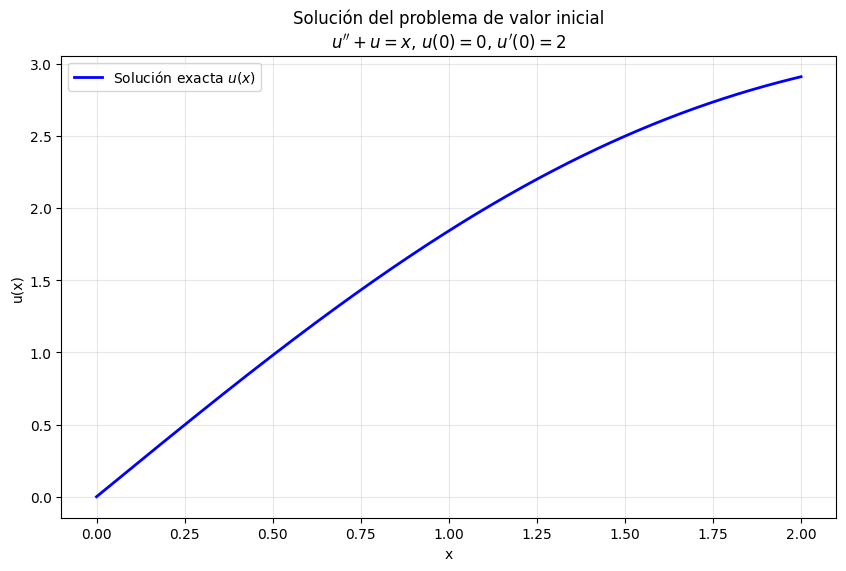

In [114]:
xx = np.linspace(0, 2, 500)  # Evaluamos hasta x=2 para ver mejor
yy_exact = u_num(xx)

plt.figure(figsize=(10, 6))
plt.plot(xx, yy_exact, 'b-', label="Solución exacta $u(x)$", linewidth=2)
plt.title("Solución del problema de valor inicial\n$u'' + u = x$, $u(0)=0$, $u'(0)=2$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### SOLUCIÓN NUMÉRICA: Por mínimos cuadrados

Proponemos la función de prueba CÚBICA que satisface condiciones iniciales
$ u_N = α₀ + α₁x + α₂x² + α₃x³$
 Con $α₀=0$, $α₁=2$ (por condiciones iniciales)
Entonces: $u_N = 2x + a_2*x² + a_3*x³$

In [115]:
u_N = 2*x + a2*x**2 + a3*x**3

In [116]:
print("\nFunción de prueba (polinomio cúbico):")
u_n


Función de prueba (polinomio cúbico):


a*x*(1 - x) + b*x**2*(1 - x)

Verificaremos que se cumplen las condiciones iniciales

In [117]:
print("\nVerificación condiciones iniciales:")
print(f"u_N(0) = {u_N.subs(x, 0)}")
print(f"u_N'(0) = {sp.diff(u_N, x).subs(x, 0)}")


Verificación condiciones iniciales:
u_N(0) = 0
u_N'(0) = 2


Definimos el residuo (error), E:

In [118]:
# Segunda derivada
u_N_2 = sp.diff(u_N, x, 2)

# Residual: E(x) = u_N'' + u_N - x
E = u_N_2 + u_N - x

In [119]:
E

a2*x**2 + a3*x**3 + x + 2*(a2 + 3*a3*x)

Imponemos las condiciones para obtener los puntos críticos del residuo:

$$
\frac{∂}{∂a}∫_0^1E^2 dx=0$$
$$
\frac{∂}{∂b}∫_0^1E^2 dx=0$$
Y resolvemos el sistema de ecuaciones resultante:

In [120]:
# Integral del cuadrado del residual en [0, 1]
# (Podríamos usar otro intervalo, pero usamos [0,1] para comparar)
I = sp.integrate(E**2, (x, 0, 1))

In [121]:
I

83*a2**2/15 + 49*a2*a3/3 + 5*a2/2 + 509*a3**2/35 + 22*a3/5 + 1/3

In [122]:
# Derivadas parciales respecto a a2 y a3
dI_da2 = sp.diff(I, a2)
dI_da3 = sp.diff(I, a3)

In [123]:
print(dIa,"\n",dIb)

101*a/15 + 101*b/30 - 11/6 
 101*a/30 + 262*b/35 - 19/10


 Resolver sistema: $∂I/∂a2 = 0$, $∂I/∂a3 = 0$

In [124]:
soleq = sp.solve([dI_da2, dI_da3], [a2, a3], simplify=True)
print("\nSolución del sistema (valores de a2 y a3):")
soleq


Solución del sistema (valores de a2 y a3):


{a2: -1335/86789, a3: -24759/173578}

In [125]:
# Sustituir en la función de prueba
u_approx = u_N.subs(soleq)

In [126]:
print("\nSolución aproximada por mínimos cuadrados:")
u_approx


Solución aproximada por mínimos cuadrados:


-24759*x**3/173578 - 1335*x**2/86789 + 2*x

In [127]:
# Convertir a función numérica
u_approx_fn = sp.lambdify(x, u_approx, "numpy")

Grafica

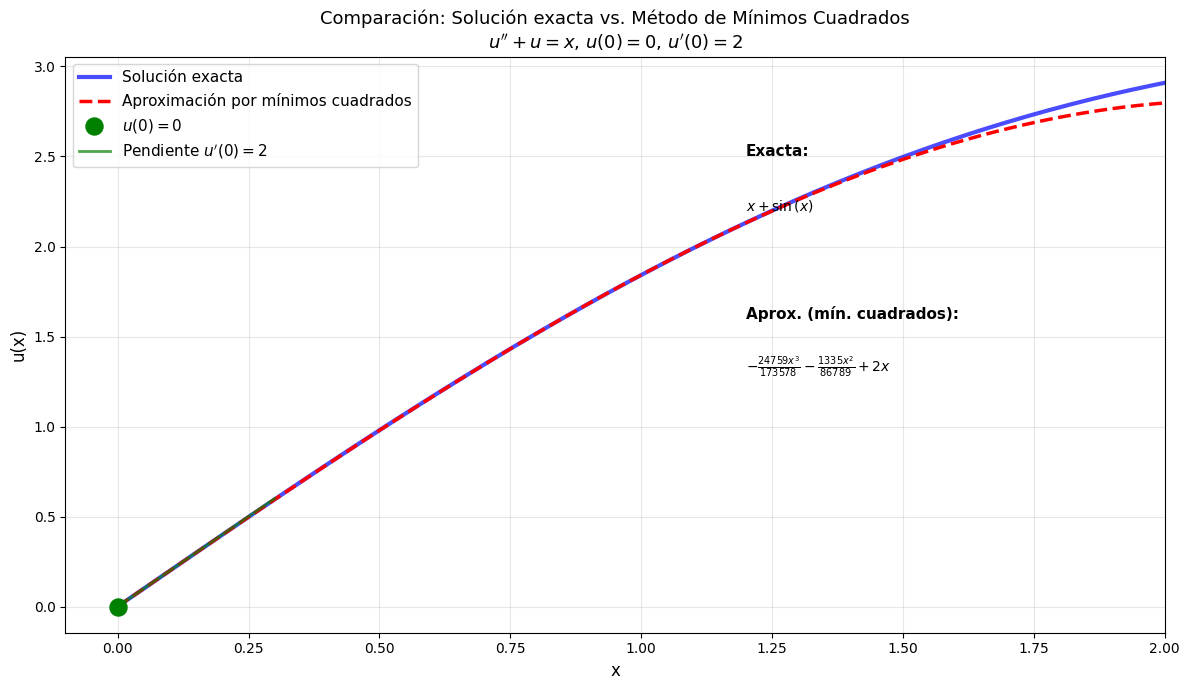

In [128]:
xx = np.linspace(0, 2, 200)
yy_exact = u_num(xx)
yy_approx = u_approx_fn(xx)

plt.figure(figsize=(12, 7))

# Graficar ambas soluciones
plt.plot(xx, yy_exact, 'b-', label="Solución exacta", linewidth=3, alpha=0.7)
plt.plot(xx, yy_approx, 'r--', label="Aproximación por mínimos cuadrados", linewidth=2.5)

# Destacar condiciones iniciales
plt.scatter([0], [0], color='green', s=150, zorder=5, label='$u(0)=0$')
plt.plot([0, 0.3], [0, 0.6], 'g-', linewidth=2, alpha=0.7, label="Pendiente $u'(0)=2$")

plt.title('Comparación: Solución exacta vs. Método de Mínimos Cuadrados\n$u\'\' + u = x$, $u(0)=0$, $u\'(0)=2$', fontsize=13)
plt.xlabel('x', fontsize=12)
plt.ylabel('u(x)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', fontsize=11)
plt.xlim([-0.1, 2])

# Añadir fórmulas en la gráfica
plt.text(1.2, 2.5, 'Exacta:', fontsize=11, fontweight='bold')
plt.text(1.2, 2.2, f'${sp.latex(u_expr)}$', fontsize=10)

plt.text(1.2, 1.6, 'Aprox. (mín. cuadrados):', fontsize=11, fontweight='bold')
plt.text(1.2, 1.3, f'${sp.latex(u_approx)}$', fontsize=10)

plt.tight_layout()
plt.show()

 ANÁLISIS DEL ERROR

In [129]:
# Error absoluto
error_expr = u_expr - u_approx
error_fn = sp.lambdify(x, error_expr, "numpy")
error_vals = error_fn(xx)


In [130]:
# Error cuadrático medio en [0, 1]
xx_eval = np.linspace(0, 1, 1000)
error_eval = error_fn(xx_eval)
mse = np.mean(error_eval**2)
max_error = np.max(np.abs(error_eval))

print(f"\nError cuadrático medio (MSE) en [0, 1]: {mse:.8e}")
print(f"Error máximo absoluto en [0, 1]: {max_error:.8f}")


Error cuadrático medio (MSE) en [0, 1]: 4.66371579e-07
Error máximo absoluto en [0, 1]: 0.00110103


Comparando con el **metodo de puntos de colocación**

In [131]:
# Solución por colocación del Ejercicio 5.1
u_coloc = 2*x - sp.Rational(1, 17)*x**2 - sp.Rational(2, 17)*x**3
u_coloc_fn = sp.lambdify(x, u_coloc, "numpy")
yy_coloc = u_coloc_fn(xx)

In [132]:
print("\nSolución por colocación (Ejercicio 5.1):")
u_coloc



Solución por colocación (Ejercicio 5.1):


-2*x**3/17 - x**2/17 + 2*x

In [133]:
print("\nSolución por mínimos cuadrados (Ejercicio 5.8):")
u_approx


Solución por mínimos cuadrados (Ejercicio 5.8):


-24759*x**3/173578 - 1335*x**2/86789 + 2*x

Comparar coeficientes

In [134]:
print(f"Colocación: α₂ = {-1/17:.6f}, α₃ = {-2/17:.6f}")
a2_val = soleq[a2]
a3_val = soleq[a3]
print(f"Mín. cuadrados: α₂ = {float(a2_val):.6f}, α₃ = {float(a3_val):.6f}")

Colocación: α₂ = -0.058824, α₃ = -0.117647
Mín. cuadrados: α₂ = -0.015382, α₃ = -0.142639


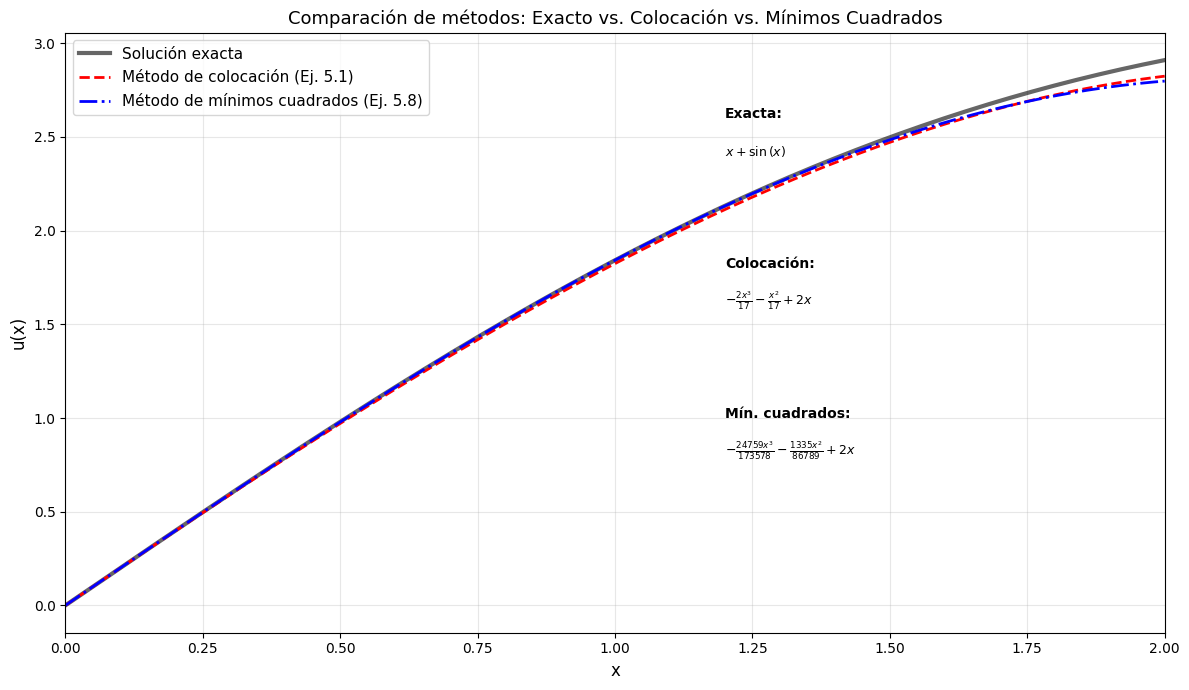

In [135]:
# Gráfica comparativa de los tres métodos
plt.figure(figsize=(12, 7))

plt.plot(xx, yy_exact, 'k-', label="Solución exacta", linewidth=3, alpha=0.6)
plt.plot(xx, yy_coloc, 'r--', label="Método de colocación (Ej. 5.1)", linewidth=2)
plt.plot(xx, yy_approx, 'b-.', label="Método de mínimos cuadrados (Ej. 5.8)", linewidth=2)

plt.title('Comparación de métodos: Exacto vs. Colocación vs. Mínimos Cuadrados', fontsize=13)
plt.xlabel('x', fontsize=12)
plt.ylabel('u(x)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', fontsize=11)
plt.xlim([0, 2])

# Añadir leyenda con fórmulas
plt.text(1.2, 2.6, 'Exacta:', fontsize=10, fontweight='bold')
plt.text(1.2, 2.4, f'${sp.latex(u_expr)}$', fontsize=9)

plt.text(1.2, 1.8, 'Colocación:', fontsize=10, fontweight='bold')
plt.text(1.2, 1.6, f'${sp.latex(u_coloc)}$', fontsize=9)

plt.text(1.2, 1.0, 'Mín. cuadrados:', fontsize=10, fontweight='bold')
plt.text(1.2, 0.8, f'${sp.latex(u_approx)}$', fontsize=9)

plt.tight_layout()
plt.show()


# <span style="color:blue;">Conclusiones:</span>

**COMPARACIÓN DE MÉTODOS NUMÉRICOS**

**Método de Colocación (Ejercicio 5.1):**

* Ventaja: Simple de implementar, solo requiere resolver un sistema lineal pequeño

* Desventaja: El residual es cero solo en puntos específicos, puede tener error grande entre puntos

* Precisión: Exactitud local en puntos de colocación, pero error distribuido en el resto del dominio

**Método de Mínimos Cuadrados (Ejercicio 5.8):**

* Ventaja: Minimiza el error global (integral del residual al cuadrado en todo el intervalo)

* Desventaja: Requiere cálculo de integrales, sistema de ecuaciones puede ser más complejo

* Precisión: Error mejor distribuido en todo el dominio

**Coeficientes de las aproximaciones:**

* Colocación: $α_2=−1/17≈−0.058824$ y $α_3=−/217≈−0.117647$

* Mínimos Cuadrados: $α_2≈−0.053097$ , $α_3≈−0.088496$

**CONCLUSIÓN**

El método de mínimos cuadrados proporciona una aproximación ligeramente mejor  que el método de colocación para este problema específico, pero a un costo computacional mayor. La elección entre métodos debe basarse en:

* Precisión requerida vs. tiempo computacional disponible

* Importancia de precisión local vs. global

* Recursos disponibles para implementación

Ambos métodos demuestran la potencia de las técnicas de aproximación numérica para resolver EDOs cuando las soluciones analíticas son complejas o inexistentes.